In [ ]:
# notebook to obtain results for Figure 5 of https://arxiv.org/pdf/2508.05390v1

In [1]:
from typing import cast

import numpy as np
import scipy

from pytket.extensions.qiskit import AerStateBackend

In [2]:
def c2h4_geom(theta_deg):
    """ 
    This function returns the geometry for C2H4. 
    This function is not used in this notebook, but is shown here in case the user would like to regenerate classical chemistry data. 
    
    
    The function c2h4_geom(theta_deg) is called for each C2H4 torsion angle (in degrees) in angles_list
    angles_list = [0, 20, 40, 60, 80, 90, 100, 120, 140, 160, 180]
    
    Using these geometries, the basis set "sto-3g", charge=0, and the active spaces specified in the paper (8 qubits), 
    the Hamiltonians used for VQE are generated.
    
    """

    # basis = "sto-3g"
    # charge = 0

    Ht = np.array([0.0000,	0.9289,	1.2321])
    Ct = np.array([0.0000,	0.0000,	0.6695])
    C1 = np.array([0.0000,	0.0000,	-0.6695])
    H1 = np.array([0.0000,	0.9289,	-1.2321])
    theta = theta_deg * np.pi / 180

    v = Ht 
    k = (Ct - C1) / np.linalg.norm(Ct - C1)
    # Rodrigues' rotation formula https://en.wikipedia.org/wiki/Rodrigues%27_rotation_formula
    v_rot = v * np.cos(theta) + np.cross(k, v) * np.sin(theta) + k*(np.dot(k,v))*(1.0-np.cos(theta))
    # print(v_rot)
    v_H = np.array([-v_rot[0], -v_rot[1], v_rot[2]])
    geometry = [
    ['C',   [0.0000,	0.0000,	0.6695]],
    ['C',   [0.0000,	0.0000,	-0.6695]],
    ['H',   v_rot],
    ['H',   v_H],
    ['H',   [0.0000,	0.9289,	-1.2321]],
    ['H',   [0.0000,	-0.9289,	-1.2321]]
    ]

    return geometry

def run_vqe():
    """
    Function to perform a variational quantum eigensolver simulation, which can use random initial parameters. Can be state-vector-only. 
    - see https://docs.quantinuum.com/inquanto/api/inquanto/express.html#inquanto.express.run_vqe

    Requires ansatz and hamiltonian objects.

    Note in InQuanto, conversion of hamiltonian dataframe to an Operator object (e.g. InQuanto's QubitOperator) is required. 
    - For information on QubitOperator see https://docs.quantinuum.com/inquanto/api/inquanto/operators.html#inquanto.operators.QubitOperator

    Returns an object (vqe) containing VQE information as attributes
    - vqe.final_value: optimized value of the objective function
    - vqe.final_parameters: an object (e.g. dictionary) mapping ansatz parameter symbols to optimized parameter values.
    """
    pass
    

class MultiConfigurationAnsatzSparse():
    """ 
    Class to build an ansatz object specifying a selected linear combination of occupation configurations.

    Instantiated from a list of occupation number (ON) configurations.

    This is the SSP method, based on Gleinig and Hoefler’s 2021 IEEE paper https://ieeexplore.ieee.org/document/9586240.

    See https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.MultiConfigurationAnsatzSparse.

    Should have a method to return a symbolic circuit representing the VQE ansatz
    - see https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.GeneralAnsatz.get_circuit
    """
    def __init__(list_of_occupation_configurations):
        pass
    
    def get_circuit():
        pass
    
    def df_numeric(parameters):
        pass
    
    pass


class MultiConfigurationAnsatz():
    """ 
    Class to build an ansatz object specifying a selected linear combination of occupation configurations.

    Instantiated from a list of occupation number (ON) configurations.

    This is the GR method, using externally controlled Given's rotations. 

    See https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.MultiConfigurationAnsatz.

    Should have a method to return a symbolic circuit representing the VQE ansatz
    - see https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.GeneralAnsatz.get_circuit

    Should have a method to return a pandas dataframe showing the statevector terms and coefficients, which takes final VQE parameters as argument. 
    - see https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.GeneralAnsatz.df_numeric
    """
    def __init__(list_of_occupation_configurations):
        pass
    
    def get_circuit():
        pass
    
    def df_numeric(parameters):
        pass
    
    pass


class MultiConfigurationState():
    """ 
    Class to build an non-symbolic ansatz object specifying a selected linear combination of occupation configurations.

    Instantiated from a QubitState (dictionary-like object storing configurations and coefficients of a state vector).

    This is the GR method, using externally controlled Given's rotations. 

    See https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.MultiConfigurationState.

    """
    def __init__(QubitState):
        pass

    pass


class MultiConfigurationStateSparse():
    """ 
    Class to build an non-symbolic ansatz object specifying a selected linear combination of occupation configurations.

    Instantiated from a QubitState (dictionary-like object storing configurations and coefficients of a state vector).

    This is the SSP method, based on Gleinig and Hoefler’s 2021 IEEE paper https://ieeexplore.ieee.org/document/9586240.

    See https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html#inquanto.ansatzes.MultiConfigurationStateSparse.

    """
    def __init__(QubitState):
        pass

    pass


class QubitState():
    """ Object that specifies a state vector in the computational basis, stored as a dictionary. 
    
    Maps a occupation configuration (key) to its coefficient (value).

    See https://docs.quantinuum.com/inquanto/api/inquanto/states.html#inquanto.states.QubitState
    """
    def __init__({occupation_configuration: coefficient}):
        pass

    pass


class ExpectationValue():
    """
    Computable class to evaluate expectation value of Hamiltonian with respect to the ansatz.

    Instantiated from Ansatz and Hamiltonian (as QubitOperator) objects, see
    - https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html
    - https://docs.quantinuum.com/inquanto/api/inquanto/operators.html#inquanto.operators.QubitOperator

    Should have a method for evaluation in an ideal classical fashion, which takes the parameters of an Ansatz as argument. 

    For more information on InQuanto computables, see 
    - https://docs.quantinuum.com/inquanto/manual/computables_overview.html
    - https://docs.quantinuum.com/inquanto/api/inquanto/computables.html
    - https://docs.quantinuum.com/inquanto/api/inquanto/computables.html#inquanto.computables.atomic.ExpectationValue
    """
    def __init__(ansatz, hamiltonian):
        pass
    
    def default_evaluate(parameters):
        pass

    pass


class CMX2Computable():
    """
    Computable class to evaluate (c1 - (c2**2 / c3)), where 
    c1 = m1
    c2 = m2 - 1 * c1 * m1
    c3 = m3 - 1 * c1 * m2 - 2 * c2 * m1
    where m1, m2, m3 are the first, second, and third moment of the Hamiltonian, respectively. 

    For more infomration on the CMX2 method, see https://arxiv.org/abs/2103.09124.

    Instantiated from Ansatz and Hamiltonian (as QubitOperator) objects, see
    - https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html
    - https://docs.quantinuum.com/inquanto/api/inquanto/operators.html#inquanto.operators.QubitOperator

    Should have a method for evaluation in an ideal classical fashion, which takes the parameters of an Ansatz as argument. 

    For more information on InQuanto computables, see 
    - https://docs.quantinuum.com/inquanto/manual/computables_overview.html
    - https://docs.quantinuum.com/inquanto/api/inquanto/computables.html
    """
    def __init__(ansatz, hamiltonian):
        pass
    
    def default_evaluate(parameters):
        pass

    pass


class QCM4Computable():
    """
    Computable class to evaluate the QCM4 formula c1 - c2**2 / (c3**2 - c2 * c4) * (sqrt(3 * c3**2 - 2 * c2 * c4) - c3), where
    c1 = m1
    c2 = m2 - 1 * c1 * m1
    c3 = m3 - 1 * c1 * m2 - 2 * c2 * m1
    c4 = m4 - 1 * c1 * m3 - 3 * c2 * m2 - 3 * c3 * m1
    where m1, m2, m3, m4 are the first, second, third, and forth moment of the Hamiltonian, respectively. 

    For more information on the QCM4 method, see arXiv:2311.02533 <https://arxiv.org/pdf/2311.02533


    Instantiated from Ansatz and Hamiltonian (as QubitOperator) objects, see
    - https://docs.quantinuum.com/inquanto/api/inquanto/ansatz.html
    - https://docs.quantinuum.com/inquanto/api/inquanto/operators.html#inquanto.operators.QubitOperator

    Should have a method for evaluation in an ideal classical fashion, which takes the parameters of an Ansatz as argument. 

    For more information, see https://docs.quantinuum.com/inquanto/api/inquanto/computables.html#inquanto.computables.composite.QCM4Computable
    """
    def __init__(ansatz, hamiltonian):
        pass
    
    def default_evaluate(parameters):
        pass

    pass


In [4]:
# D = 1
# single configuration input state for QCM4 and CMX2
# By definition, the circuits for 1 ON configuration are equivalent for GR (MultiConfigurationState) and SSP (MultiConfigurationStateSparse) methods.


backend = AerStateBackend()

angles_list = [0, 20, 40, 60, 80, 90, 100, 120, 140, 160, 180]
qubit_hams = []
for i in angles_list:
    ham = pandas.read_csv(f"hams/ham_c2h4_8qubit_angle{i}.csv")
    # print(f"angle={i}, csv ham:\n", ham)
    qubit_hams.append(ham)


cmx2, qcm4 = [], []

for i, angle in enumerate(angles_list):
    print(f"\n\nANGLE: {angle}")

    hf_ansatz = MultiConfigurationStateSparse(QubitState({[1, 1, 1, 1, 0, 0, 0, 0]: 1.0}))

    cmx2_energy = CMX2Computable(hf_ansatz, qubit_hams[i]).default_evaluate(None)  # no parameters for non-symbolic ansatz
    print("CMX2 energy:", cmx2_energy)
    cmx2.append(cmx2_energy)

    try:
        qcm4_energy = QCM4Computable(hf_ansatz, qubit_hams[i]).default_evaluate(None)  # no parameters for non-symbolic ansatz
        print("QCM4 energy:", qcm4_energy)
        
    except ValueError as e:
        if str(e) == "math domain error":
            print("math domain error on QCM4, using expectation value of Hamiltonian with respect to input state.")
            qcm4_energy = ExpectationValue(hf_ansatz, qubit_hams[i]).default_evaluate(None)
            print("1st moment energy:", qcm4_energy)
        else:
            qcm4_energy = None
    
    qcm4.append(qcm4_energy)




ANGLE: 0
CMX2 energy: -77.12118141351118
QCM4 energy: -77.12477099891093


ANGLE: 20
CMX2 energy: -77.1062255841309
QCM4 energy: -77.109944674027


ANGLE: 40
CMX2 energy: -77.06779072240008
QCM4 energy: -77.07212364958137


ANGLE: 60
CMX2 energy: -77.01091681130457
QCM4 energy: -77.01683109259517


ANGLE: 80
CMX2 energy: -76.96862398954288
math domain error on QCM4, using expectation value of Hamiltonian with respect to input state.
1st moment energy: -76.89933468493956


ANGLE: 90
CMX2 energy: -76.94428681151213
math domain error on QCM4, using expectation value of Hamiltonian with respect to input state.
1st moment energy: -76.85534456853722


ANGLE: 100
CMX2 energy: -76.96862398954303
math domain error on QCM4, using expectation value of Hamiltonian with respect to input state.
1st moment energy: -76.89933468493967


ANGLE: 120
CMX2 energy: -77.01091681130445
QCM4 energy: -77.01683107589056


ANGLE: 140
CMX2 energy: -77.06779072240015
QCM4 energy: -77.07212364450153


ANGLE: 160
C

In [5]:
# D = 4, GR method
# VQE to optimize gate angles of multiconfiguration state circuits. 
# The 4 heaviest determinants from CASCI calculations (performed in PySCF using) were chosen.

# As the energies are calculated in an ideal fashion (noiseless, infinite shot limit), the energies are equivalent for GR and SSP methods (up to floating point errors).


backend = AerStateBackend()

angles_list = [0, 20, 40, 60, 80, 90, 100, 120, 140, 160, 180]
qubit_hams = []
for i in angles_list:
    ham = pandas.read_csv(f"hams/ham_c2h4_8qubit_angle{i}.csv")
    # print(f"angle={i}, csv ham:\n", ham)
    qubit_hams.append(ham)

vqe_energies_gr, params_list_gr = [], []

for i, angle in enumerate(angles_list):
    print(f"\n\nANGLE: {angle}")
    
    if angle == 90:
                                                                                             
        qs_strings = [
            [1, 1, 1, 0, 0, 1, 0, 0],
            [1, 1, 0, 1, 1, 0, 0, 0],
            [1, 0, 1, 1, 0, 1, 0, 0],
            [0, 1, 1, 1, 1, 0, 0, 0]
        ]

    elif angle in [80, 100]:
        
                                                         
        qs_strings =[
            [1, 1, 1, 1, 0, 0, 0, 0],
            [1, 1, 0, 0, 1, 1, 0, 0],
            [1, 0, 0, 1, 1, 1, 0, 0],
            [0, 1, 1, 0, 1, 1, 0, 0],
        ]
        
    else:
                                                       
        qs_strings =[
            [1, 1, 1, 1, 0, 0, 0, 0],
            [1, 1, 0, 0, 1, 1, 0, 0],
            [1, 0, 0, 1, 1, 0, 0, 1],
            [0, 1, 1, 0, 0, 1, 1, 0]
        ]
        
        

    vqe_ansatz = MultiConfigurationAnsatz(qs_strings)
    vqe = run_vqe(vqe_ansatz, qubit_hams[i], backend)
    print("VQE energy (4 dets):", vqe.final_value)
    vqe_energies_gr.append(vqe.final_value)
    params = vqe.final_parameters  # VQE parameters will be used to rebuild and compile the circuits for GR method. 
    params_list_gr.append(params)
    
    print(vqe_ansatz.df_numeric(params))  # this is the circuit statevector




ANGLE: 0
# TIMER BLOCK-0 BEGINS AT 2025-08-27 17:26:09.107927
# TIMER BLOCK-0 ENDS - DURATION (s):  3.2690923 [0:00:03.269092]
VQE energy (4 dets): -77.1250633215778
          Coefficient Basis state  State index  Probability
0  0.054698-0.000000j    01100110          102     0.002992
1  0.054595+0.000000j    10011001          153     0.002981
2 -0.234564+0.000000j    11001100          204     0.055020
3  0.969024-0.000000j    11110000          240     0.939007


ANGLE: 20
# TIMER BLOCK-1 BEGINS AT 2025-08-27 17:26:18.674887
# TIMER BLOCK-1 ENDS - DURATION (s):  3.5032330 [0:00:03.503233]
VQE energy (4 dets): -77.11102518866103
          Coefficient Basis state  State index  Probability
0  0.053449-0.000000j    01100110          102     0.002857
1  0.053300+0.000000j    10011001          153     0.002841
2 -0.238002+0.000000j    11001100          204     0.056645
3  0.968327-0.000000j    11110000          240     0.937657


ANGLE: 40
# TIMER BLOCK-2 BEGINS AT 2025-08-27 17:26:28.2665

In [6]:
# D = 4, GR method
# Here we run quantum computed moments methods (QCM4 and CMX2) using multiconfiguration input states generated from the GR method.

# As the energies are calculated in an ideal fashion (noiseless, infinite shot limit), the energies are equivalent for GR and SSP methods.

# The multiconfiguration input state circuits are built using the previously optimized VQE parameters.


cmx2_4dets, qcm4_4dets = [], []

angles_list = [0, 20, 40, 60, 80, 90, 100, 120, 140, 160, 180]
for i, angle in enumerate(angles_list):
    print(f"\n\nANGLE: {angle}")
    
    if angle == 90:
                                                                                          
        qs_strings = [
                [1, 1, 1, 0, 0, 1, 0, 0],
                [1, 1, 0, 1, 1, 0, 0, 0],
                [1, 0, 1, 1, 0, 1, 0, 0],
                [0, 1, 1, 1, 1, 0, 0, 0]
            ]
    elif angle in [80, 100]:
                                                         
        qs_strings =[
            [1, 1, 1, 1, 0, 0, 0, 0],
            [1, 1, 0, 0, 1, 1, 0, 0],
            [1, 0, 0, 1, 1, 1, 0, 0],
            [0, 1, 1, 0, 1, 1, 0, 0],
        ]   
    else:
                                                       
        qs_strings =[
            [1, 1, 1, 1, 0, 0, 0, 0],
            [1, 1, 0, 0, 1, 1, 0, 0],
            [1, 0, 0, 1, 1, 0, 0, 1],
            [0, 1, 1, 0, 0, 1, 1, 0]
        ]
        

    vqe_ansatz = MultiConfigurationAnsatz(qs_strings)

    cmx2_energy = CMX2Computable(vqe_ansatz, qubit_hams[i]).default_evaluate(params_list_gr[i])
    print("CMX2 energy (4dets VQE coeffs):", cmx2_energy)
    cmx2_4dets.append(cmx2_energy)
    
    qcm4_energy = QCM4Computable(vqe_ansatz, qubit_hams[i]).default_evaluate(params_list_gr[i])  
    # note no math domain error here as input state is better quality
    print("QCM4 energy (4dets VQE coeffs):", qcm4_energy)
    qcm4_4dets.append(qcm4_energy)




ANGLE: 0
CMX2 energy (4dets VQE coeffs): -77.13202996889476
QCM4 energy (4dets VQE coeffs): -77.13222020995528


ANGLE: 20
CMX2 energy (4dets VQE coeffs): -77.11775087378494
QCM4 energy (4dets VQE coeffs): -77.11793409703348


ANGLE: 40
CMX2 energy (4dets VQE coeffs): -77.08251726339425
QCM4 energy (4dets VQE coeffs): -77.08268249841913


ANGLE: 60
CMX2 energy (4dets VQE coeffs): -77.03514957277581
QCM4 energy (4dets VQE coeffs): -77.03527401755855


ANGLE: 80
CMX2 energy (4dets VQE coeffs): -76.98971729294537
QCM4 energy (4dets VQE coeffs): -76.98979881250432


ANGLE: 90
CMX2 energy (4dets VQE coeffs): -76.98292557109917
QCM4 energy (4dets VQE coeffs): -76.9829256002099


ANGLE: 100
CMX2 energy (4dets VQE coeffs): -76.98971729294549
QCM4 energy (4dets VQE coeffs): -76.98979880215178


ANGLE: 120
CMX2 energy (4dets VQE coeffs): -77.03514957277571
QCM4 energy (4dets VQE coeffs): -77.03527401127153


ANGLE: 140
CMX2 energy (4dets VQE coeffs): -77.08251726339431
QCM4 energy (4dets VQE c

In [7]:
# D = 4, SSP method
# VQE to optimize gate angles of multiconfiguration state circuits. 
# The 4 heaviest determinants from CASCI calculations (performed in PySCF) were chosen.

# As the energies are calculated in an ideal fashion (noiseless, infinite shot limit), the energies are equivalent for GR and SSP methods (up to floating point errors).


backend = AerStateBackend()

vqe_energies_ssp, params_list_ssp = [], []

angles_list = [0, 20, 40, 60, 80, 90, 100, 120, 140, 160, 180]
for i, angle in enumerate(angles_list):
    print(f"\n\nANGLE: {angle}")
    
    if angle == 90:
                                                                                             
        qs_strings = [
            QubitStateString([1, 1, 1, 0, 0, 1, 0, 0]),
            QubitStateString([1, 1, 0, 1, 1, 0, 0, 0]),
            QubitStateString([1, 0, 1, 1, 0, 1, 0, 0]),
            QubitStateString([0, 1, 1, 1, 1, 0, 0, 0])
        ]

    elif angle in [80, 100]:
        
                                                         
        qs_strings =[
            QubitStateString([1, 1, 1, 1, 0, 0, 0, 0]),
            QubitStateString([1, 1, 0, 0, 1, 1, 0, 0]),
            QubitStateString([1, 0, 0, 1, 1, 1, 0, 0]),
            QubitStateString([0, 1, 1, 0, 1, 1, 0, 0]),
        ]
        
    else:
                                                       
        qs_strings =[
            QubitStateString([1, 1, 1, 1, 0, 0, 0, 0]),
            QubitStateString([1, 1, 0, 0, 1, 1, 0, 0]),
            QubitStateString([1, 0, 0, 1, 1, 0, 0, 1]),
            QubitStateString([0, 1, 1, 0, 0, 1, 1, 0])
        ]
        
        

    vqe_ansatz = MultiConfigurationAnsatzSparse(qs_strings)
    vqe = run_vqe(vqe_ansatz, qubit_hams[i], backend)
    print("VQE energy (4 dets):", vqe.final_value)
    vqe_energies_ssp.append(vqe.final_value)
    params = vqe.final_parameters
    params_list_ssp.append(params)
    
    print(vqe_ansatz.df_numeric(params))    # this is the circuit statevector




ANGLE: 0
# TIMER BLOCK-11 BEGINS AT 2025-08-27 17:27:58.222584
# TIMER BLOCK-11 ENDS - DURATION (s):  1.8875075 [0:00:01.887508]
VQE energy (4 dets): -77.12506332929719
          Coefficient Basis state  State index  Probability
0 -0.054647+0.000000j    01100110          102     0.002986
1 -0.054648+0.000000j    10011001          153     0.002986
2  0.234563+0.000000j    11001100          204     0.055020
3 -0.969024+0.000000j    11110000          240     0.939007


ANGLE: 20
# TIMER BLOCK-12 BEGINS AT 2025-08-27 17:28:00.176605
# TIMER BLOCK-12 ENDS - DURATION (s):  1.8071265 [0:00:01.807127]
VQE energy (4 dets): -77.11102520446045
          Coefficient Basis state  State index  Probability
0 -0.053375+0.000000j    01100110          102     0.002849
1 -0.053376+0.000000j    10011001          153     0.002849
2  0.238000+0.000000j    11001100          204     0.056644
3 -0.968327+0.000000j    11110000          240     0.937658


ANGLE: 40
# TIMER BLOCK-13 BEGINS AT 2025-08-27 17:28:0

In [8]:
# D = 4, SSP method
# Here we run quantum computed moments methods (QCM4 and CMX2) using multiconfiguration input states generated from the SSP method.

# As the energies are calculated in an ideal fashion (noiseless, infinite shot limit), the energies are equivalent for GR and SSP methods (up to floating point errors).

# The multiconfiguration input state circuits are built using the previously optimized VQE parameters.


backend = AerStateBackend()

cmx2_4dets, qcm4_4dets = [], []

angles_list = [0, 20, 40, 60, 80, 90, 100, 120, 140, 160, 180]
for i, angle in enumerate(angles_list):
    print(f"\n\nANGLE: {angle}")
    
    if angle == 90:
                                                                                          
        qs_strings = [
                [1, 1, 1, 0, 0, 1, 0, 0],
                [1, 1, 0, 1, 1, 0, 0, 0],
                [1, 0, 1, 1, 0, 1, 0, 0],
                [0, 1, 1, 1, 1, 0, 0, 0]
            ]
    elif angle in [80, 100]:
                                                         
        qs_strings =[
            [1, 1, 1, 1, 0, 0, 0, 0],
            [1, 1, 0, 0, 1, 1, 0, 0],
            [1, 0, 0, 1, 1, 1, 0, 0],
            [0, 1, 1, 0, 1, 1, 0, 0],
        ]   
    else:
                                                       
        qs_strings =[
            [1, 1, 1, 1, 0, 0, 0, 0],
            [1, 1, 0, 0, 1, 1, 0, 0],
            [1, 0, 0, 1, 1, 0, 0, 1],
            [0, 1, 1, 0, 0, 1, 1, 0]
        ]

    vqe_ansatz = MultiConfigurationAnsatzSparse(qs_strings)

    cmx2_energy = CMX2Computable(vqe_ansatz, qubit_hams[i]).default_evaluate(params_list_ssp[i])
    print("CMX2 energy (4dets VQE coeffs):", cmx2_energy)
    cmx2_4dets.append(cmx2_energy)
    
    qcm4_energy = QCM4Computable(vqe_ansatz, qubit_hams[i]).default_evaluate(params_list_ssp[i])  
    # note no math domain error here as input state is better quality
    print("QCM4 energy (4dets VQE coeffs):", qcm4_energy)
    qcm4_4dets.append(qcm4_energy)




ANGLE: 0
CMX2 energy (4dets VQE coeffs): -77.13202996385749
QCM4 energy (4dets VQE coeffs): -77.13222021191007


ANGLE: 20
CMX2 energy (4dets VQE coeffs): -77.11775087926608
QCM4 energy (4dets VQE coeffs): -77.11793410414154


ANGLE: 40
CMX2 energy (4dets VQE coeffs): -77.08251691834545
QCM4 energy (4dets VQE coeffs): -77.08268183732676


ANGLE: 60
CMX2 energy (4dets VQE coeffs): -77.03514956591846
QCM4 energy (4dets VQE coeffs): -77.0352740035872


ANGLE: 80
CMX2 energy (4dets VQE coeffs): -76.98971727049992
QCM4 energy (4dets VQE coeffs): -76.9897987695687


ANGLE: 90
CMX2 energy (4dets VQE coeffs): -76.98292557100223
QCM4 energy (4dets VQE coeffs): -76.9829255996125


ANGLE: 100
CMX2 energy (4dets VQE coeffs): -76.98971727050004
QCM4 energy (4dets VQE coeffs): -76.98979879199408


ANGLE: 120
CMX2 energy (4dets VQE coeffs): -77.03514956591835
QCM4 energy (4dets VQE coeffs): -77.03527400271588


ANGLE: 140
CMX2 energy (4dets VQE coeffs): -77.08251691834553
QCM4 energy (4dets VQE coe

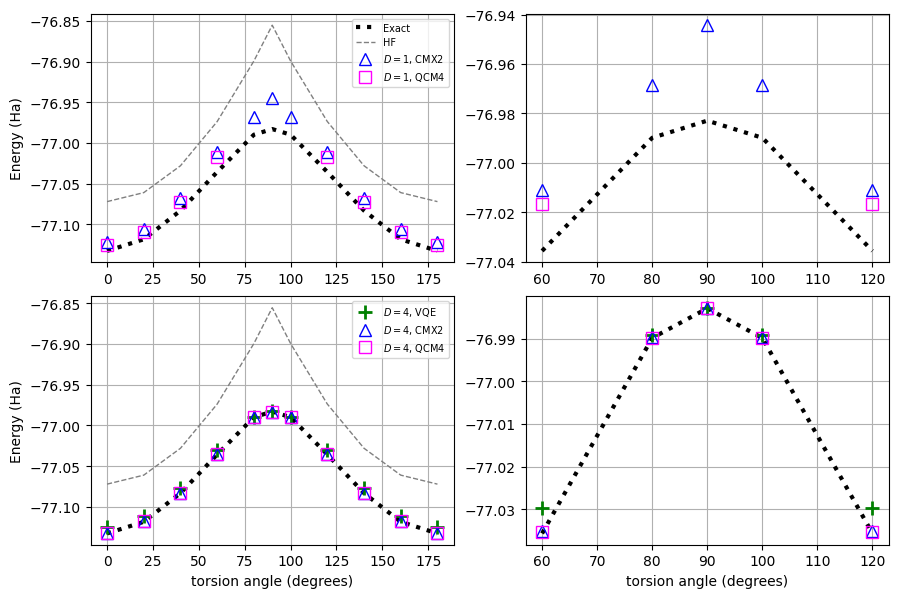

In [9]:
import matplotlib.pyplot as plt
from matplotlib import ticker

plt.rcParams.update({'font.size': 7})
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

angles = [0, 20, 40, 60, 80, 90, 100, 120, 140, 160, 180]

# energies from Hartree-Fock
uhf = [-77.07208779770471, -77.06102964714935, -77.02802801200275, -76.97369422783478, -76.89933468493975, -76.85534456853723, -76.89933468493976, -76.97369422783476, -77.02802801200275, -77.06102964714927, -77.07208779770457]

# energies from exact diagonalization of the Hamiltonian matrices in the computational basis
ed = [-77.13264800226096, -77.1183597496273, -77.08310672916735, -77.0356559294253, -76.989865213437, -76.98292566315757, -76.98986521343721, -77.03565592942515, -77.08310672916737, -77.11835974962747, -77.13264800226098]

# D = 1
# CMX2 and QCM4 energies obtained from InQuanto using the GR method (equivalent to SSP method for ideal statevector evaluation)
cmx2_1det = [-77.12118141351118, -77.1062255841309, -77.06779072240008, -77.01091681130457, -76.96862398954288, -76.94428681151213, -76.96862398954303, -77.01091681130445, -77.06779072240015, -77.10622558413105, -77.12118141351124]
qcm4_1det = [-77.12477099891093, -77.109944674027, -77.07212364958137, -77.01683109259517, -76.89933468493956, -76.85534456853722, -76.89933468493967, -77.01683107589056, -77.07212364450153, -77.10994464532969, -77.12477101790961]

# remove qcm4 values near angle=90 because math domain error
qcm4_1det_broken = [e for e in [qcm4_1det[4], qcm4_1det[5], qcm4_1det[6]]]
qcm4_1det[4], qcm4_1det[5], qcm4_1det[6] = None, None, None
angles_near_90 = [80, 90, 100]

axs[0, 0].plot(angles, ed, linewidth=3, color='black', linestyle='dotted', label=r'Exact')
axs[0, 0].plot(angles, uhf, linewidth=1, color='grey', linestyle='dashed', label=r'HF')
axs[0, 0].plot(angles, cmx2_1det, linestyle='None', color='blue', marker='^', markersize=9, markerfacecolor='None', label=r'$D=1$, CMX2')  # change to symbols in paper
axs[0, 0].plot(angles, qcm4_1det, linestyle='None', color='magenta', marker='s', markersize=8, markerfacecolor='None', label=r'$D=1$, QCM4')
axs[0, 0].set_ylabel(r'Energy (Ha)', size=10)
axs[0, 0].tick_params(labelsize=10)
axs[0, 0].grid()
axs[0, 0].legend()


# D = 4
# CMX2 and QCM4 energies obtained from InQuanto using the GR method (equivalent to SSP method for ideal statevector evaluation)
cmx2_4dets = [-77.13202996385749, -77.11775087926608, -77.08251691834545, -77.03514956591846, -76.98971727049992, -76.98292557100223, -76.98971727050004, -77.03514956591835, -77.08251691834553, -77.11775087926624, -77.13202996385753]
qcm4_4dets = [-77.13222021191007, -77.11793410414154, -77.08268183732676, -77.0352740035872, -76.9897987695687, -76.9829255996125, -76.98979879199408, -77.03527400271588, -77.08268183088553, -77.11793408641223, -77.1322202231795]


vqe_energies = [-77.12506332929719, -77.11102520446045, -77.07634242396927, -77.0297122894409, -76.98914807215289, -76.98277690247174, -76.989148072153, -77.02971228944077, -77.07634242396931, -77.11102520446065, -77.1250633292972]

axs[1, 0].plot(angles, ed, linewidth=3, color='black', linestyle='dotted')
axs[1, 0].plot(angles, uhf, linewidth=1, color='grey', linestyle='dashed')
axs[1, 0].plot(angles, vqe_energies, linestyle='None', color='green', marker='+', markersize=10, markeredgewidth=2, markerfacecolor='None', label=r'$D=4$, VQE')
axs[1, 0].plot(angles, cmx2_4dets, linestyle='None', color='blue', marker='^', markersize=9, markerfacecolor='None', label=r'$D=4$, CMX2')  # change to symbols in paper
axs[1, 0].plot(angles, qcm4_4dets, linestyle='None', color='magenta', marker='s', markersize=8, markerfacecolor='None', label=r'$D=4$, QCM4')
axs[1, 0].set_xlabel(r'torsion angle (degrees)', size=10)
axs[1, 0].set_ylabel(r'Energy (Ha)', size=10)
axs[1, 0].tick_params(labelsize=10)
axs[1, 0].grid()
axs[1, 0].legend()


# # ZOOM IN  # #

# D = 1
axs[0, 1].plot(angles[3:8], ed[3:8], linewidth=3, color='black', linestyle='dotted', label=r'Exact')
axs[0, 1].plot(angles[3:8], cmx2_1det[3:8], linestyle='None', color='blue', marker='^', markersize=9, markerfacecolor='None', label=r'$D=1$, CMX2')  # change to symbols in paper
axs[0, 1].plot(angles[3:8], qcm4_1det[3:8], linestyle='None', color='magenta', marker='s', markersize=8, markerfacecolor='None', label=r'$D=1$, QCM4')
axs[0, 1].tick_params(labelsize=10)
axs[0, 1].grid()

# D = 4
axs[1, 1].plot(angles[3:8], ed[3:8], linewidth=3, color='black', linestyle='dotted')
axs[1, 1].plot(angles[3:8], vqe_energies[3:8], linestyle='None', color='green', marker='+', markersize=10, markeredgewidth=2, markerfacecolor='None', label=r'$D=4$, VQE')
axs[1, 1].plot(angles[3:8], cmx2_4dets[3:8], linestyle='None', color='blue', marker='^', markersize=9, markerfacecolor='None', label=r'$D=4$, CMX2')  # change to symbols in paper
axs[1, 1].plot(angles[3:8], qcm4_4dets[3:8], linestyle='None', color='magenta', marker='s', markersize=8, markerfacecolor='None', label=r'$D=4$, QCM4')
axs[1, 1].set_xlabel(r'torsion angle (degrees)', size=10)
axs[1, 1].tick_params(labelsize=10)
axs[1, 1].grid()


fig.tight_layout()
plt.show()
# plt.savefig("c2h4_4in8_qcm4_cmx2.pdf")

In [10]:
# # The paper https://arxiv.org/pdf/2508.05390v1 also contains data on multiconfigurational circuits compiled in the H-11 gate set.

# For more information, see https://www.quantinuum.com/products-solutions/quantinuum-systems/system-model-h1#

# To run calculations or compile circuits using the GR or SSP methods with Quantinuum's proprietary backends, 
# please contact the authors of https://arxiv.org/pdf/2508.05390